In [1]:

#numpy for multidimensional arrays and matrices
import numpy as np 
#pandas for analysis , data cleaning
import pandas as pd
#pyplot for visualising data on a plot,pie chart and showing image
from matplotlib import pyplot as plt
#seaborn for histplots for EDA
import seaborn as sns 
#os for making,editing and removing directory
import os
#tensorflow for open source library to import keras
import tensorflow as tf
print ('Tensorflow Version:',tf.__version__)
#keras to create artificial neural network (cnn model) 
from tensorflow import keras
print ('Keras Version:',keras.__version__)
#cv2( open cv ) in order to read images
import cv2
#glob to find all files/pathnames that match a specified way we have given.
import glob
#element tree to parase xml files
from xml.etree import ElementTree

# from torchvision import datasets,transforms,models

Tensorflow Version: 2.9.1
Keras Version: 2.9.0


In [2]:
os.chdir('C:/Users/paulraj/OneDrive/Desktop/mask_dataset/New_folder/')

In [3]:
label_path='C:/Users/paulraj/OneDrive/Desktop/mask_dataset/New_folder/annotations/'
image_path='C:/Users/paulraj/OneDrive/Desktop/mask_dataset/New_folder/images/'

In [4]:
#file location of face-mask-detection/annotations into annotations
annotations=label_path
#file location of face-mask-detection/images into images
images=image_path

In [5]:
#listing all annoations into annootations_files
annotation_files=os.listdir(label_path)
annotation_files[:5]

['maksssksksss0.xml',
 'maksssksksss1.xml',
 'maksssksksss10.xml',
 'maksssksksss100.xml',
 'maksssksksss101.xml']

In [6]:
#listing all images into image_files
image_files= os.listdir(image_path)
image_files[:5]

['maksssksksss0.png',
 'maksssksksss1.png',
 'maksssksksss10.png',
 'maksssksksss100.png',
 'maksssksksss101.png']

In [7]:
#total number of files and images in the dataset which must be equivalent to each other
len(annotation_files),len(image_files)

(854, 853)

data ext

In [8]:

#to extract necessary info present in the xml document in a dictionary format
info={
    'xmin':[],
    'ymin':[],
    'xmax':[],
    'ymax':[],
    'label':[],
    'file':[],
    'width':[],
    'height':[]    
}
#finding all files ending with xml
for i in glob.glob(annotations+'/*.xml'):
    #parsing all xml files with element tree
    tree=ElementTree.parse(i)
    #getting all the neceesary attribute info into the dictionary
    for element in tree.iter():
        
        if 'size' in element.tag:
            for attri in list(element):
                if 'width' in attri.tag:
                    width=int(round(float(attri.text)))
                if 'height' in attri.tag:
                    height=int(round(float(attri.text)))
    
        if 'object' in element.tag:
            for attri in list(element):
            
                if 'name' in attri.tag:
                    name=attri.text
                    info['label']+=[name]
                    info['width']+=[width]
                    info['height']+=[height]
                    #file name present as ../input/face-mask-detection/annotations/maksssksksss.xml 
                    #so spliting name by '/' then using last portion thats-  makssksksss.xml -{.xml} 
                    info['file']+=[i.split('/')[-1][0:-4]]

                
                if 'bndbox' in attri.tag:
                    for dimension in list(attri):
                        if 'xmin' in dimension.tag:
                            xmin=int(round(float(dimension.text)))
                            info['xmin']+=[xmin]
                        if 'ymin' in dimension.tag:
                            ymin=int(round(float(dimension.text)))
                            info['ymin']+=[ymin]
                        if 'xmax' in dimension.tag:
                            xmax=int(round(float(dimension.text)))
                            info['xmax']+=[xmax]
                        if 'ymax' in dimension.tag:
                            ymax=int(round(float(dimension.text)))
                            info['ymax']+=[ymax]
print(type(info))

<class 'dict'>


In [9]:
#for aligning dictionary in form of 2D structure in tables and columns which is mutuable
annotations_info_df = pd.DataFrame(info)
b=[]
a=annotations_info_df.file
for i in range(len(a)):  
    a=annotations_info_df.file.str.split('\\')[i][1]
    b.append(a)
annotations_info_df.file=b
annotations_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height
0,79,105,109,142,without_mask,maksssksksss0,512,366
1,185,100,226,144,with_mask,maksssksksss0,512,366
2,325,90,360,141,without_mask,maksssksksss0,512,366
3,321,34,354,69,with_mask,maksssksksss1,400,156
4,224,38,261,73,with_mask,maksssksksss1,400,156
5,299,58,315,81,with_mask,maksssksksss1,400,156
6,143,74,174,115,with_mask,maksssksksss1,400,156
7,74,69,95,99,with_mask,maksssksksss1,400,156
8,191,67,221,93,with_mask,maksssksksss1,400,156
9,21,73,44,93,with_mask,maksssksksss1,400,156


In [10]:
#adding annotations and image file names into annotations dataframe
annotations_info_df['annotation_file']= annotations_info_df['file']+'.xml'
annotations_info_df['image_file']=annotations_info_df['file']+'.png'

annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,79,105,109,142,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png
1,185,100,226,144,with_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png
2,325,90,360,141,without_mask,maksssksksss0,512,366,maksssksksss0.xml,maksssksksss0.png
3,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
4,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png
...,...,...,...,...,...,...,...,...,...,...
4067,263,62,287,85,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png
4068,344,80,377,106,with_mask,maksssksksss98,400,267,maksssksksss98.xml,maksssksksss98.png
4069,181,54,273,162,mask_weared_incorrect,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png
4070,99,87,176,165,with_mask,maksssksksss99,400,267,maksssksksss99.xml,maksssksksss99.png


In [11]:
#used to render the image in  a 12:8 format
def render(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image)
    plt.show()
# since image read by opencv is in bgr format we need to convert it into rgb format
def convert_RGB(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [12]:
#since 737 is a iamge at first location
annotations_info_df['image_file'].iloc[0]

'maksssksksss0.png'

In [13]:
image_path

'C:/Users/paulraj/OneDrive/Desktop/mask_dataset/New_folder/images/'

In [14]:
#forming the file path of image 
image_path= images + annotations_info_df['image_file'].iloc[0]
image_path

'C:/Users/paulraj/OneDrive/Desktop/mask_dataset/New_folder/images/maksssksksss0.png'

In [15]:
#read image through opencv which converts image to a array of 3d martrices
image737=cv2.imread(image_path)
image737.shape

(366, 512, 3)

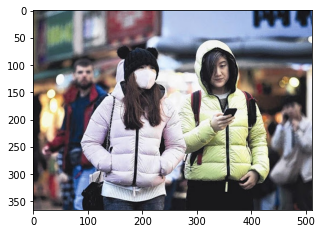

In [16]:
#rendering the image we choose in RGB format
render(convert_RGB(image737))

In [17]:
#finding corresponding annotations to the image
annotation737=label_path + annotations_info_df['annotation_file'].iloc[0]
annotation737

'C:/Users/paulraj/OneDrive/Desktop/mask_dataset/New_folder/annotations/maksssksksss0.xml'

In [18]:
#returns a tuple of the number of rows, columns, and channels
image737.shape
#here three channels represent RGB

(366, 512, 3)

In [19]:
#After the crop ,total images should be equal to length of annotations
# which defines the number of faces present in the data

len(annotations_info_df),annotations_info_df.head(10)

(4072,
    xmin  ymin  xmax  ymax         label           file  width  height  \
 0    79   105   109   142  without_mask  maksssksksss0    512     366   
 1   185   100   226   144     with_mask  maksssksksss0    512     366   
 2   325    90   360   141  without_mask  maksssksksss0    512     366   
 3   321    34   354    69     with_mask  maksssksksss1    400     156   
 4   224    38   261    73     with_mask  maksssksksss1    400     156   
 5   299    58   315    81     with_mask  maksssksksss1    400     156   
 6   143    74   174   115     with_mask  maksssksksss1    400     156   
 7    74    69    95    99     with_mask  maksssksksss1    400     156   
 8   191    67   221    93     with_mask  maksssksksss1    400     156   
 9    21    73    44    93     with_mask  maksssksksss1    400     156   
 
      annotation_file         image_file  
 0  maksssksksss0.xml  maksssksksss0.png  
 1  maksssksksss0.xml  maksssksksss0.png  
 2  maksssksksss0.xml  maksssksksss0.png  
 3  m

In [20]:
#spliting the data into 80-20% for train and test respectively
from sklearn.model_selection import train_test_split
train_df,test_df= train_test_split(annotations_info_df,test_size=0.20)

In [21]:
train_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
2534,43,138,62,160,without_mask,maksssksksss570,400,266,maksssksksss570.xml,maksssksksss570.png
1808,206,117,267,185,with_mask,maksssksksss441,400,266,maksssksksss441.xml,maksssksksss441.png
3123,141,187,237,307,without_mask,maksssksksss68,301,400,maksssksksss68.xml,maksssksksss68.png
2763,349,100,358,110,with_mask,maksssksksss603,400,278,maksssksksss603.xml,maksssksksss603.png
1912,206,69,221,88,with_mask,maksssksksss460,400,267,maksssksksss460.xml,maksssksksss460.png
...,...,...,...,...,...,...,...,...,...,...
2678,95,64,102,70,with_mask,maksssksksss603,400,278,maksssksksss603.xml,maksssksksss603.png
1457,330,73,365,107,with_mask,maksssksksss373,512,340,maksssksksss373.xml,maksssksksss373.png
3835,56,47,223,238,with_mask,maksssksksss811,267,400,maksssksksss811.xml,maksssksksss811.png
2448,130,118,155,146,with_mask,maksssksksss556,400,198,maksssksksss556.xml,maksssksksss556.png


In [22]:
#getting the shape of the dataframe
train_df.shape,test_df.shape


((3257, 10), (815, 10))

In [23]:
#checking for the number of categories of the image label
classes= list(train_df['label'].unique())
classes

['without_mask', 'with_mask', 'mask_weared_incorrect']

In [24]:
#Doing object classification on single random image to see if person 
#in the image is masked ,no masked and incorrectly worn
train_df[train_df['file']=='maksssksksss52']['label'].unique()

array(['with_mask', 'without_mask', 'mask_weared_incorrect'], dtype=object)

In [25]:
#reading the image
image52_path='C:/Users/paulraj/OneDrive/Desktop/mask_dataset/New_folder/images/maksssksksss5.png'
image52= cv2.imread(image52_path)
# image52

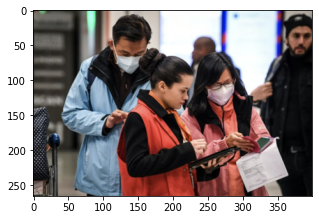

In [26]:
#rendering the image in RGB format
image52_rgb=convert_RGB(image52)
render(image52_rgb)

In [27]:
#finding annotations corresponding to the image 
image52_df=train_df[train_df['file']== 'maksssksksss5']
image52_df


,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
2073,192,106,229,144,without_mask,maksssksksss5,400,266,maksssksksss5.xml,maksssksksss5.png
2072,364,30,401,66,without_mask,maksssksksss5,400,266,maksssksksss5.xml,maksssksksss5.png
2071,118,54,161,96,with_mask,maksssksksss5,400,266,maksssksksss5.xml,maksssksksss5.png


In [28]:
#adding the persons into withmask ,withoutmask, incorrectly worn lists 
withmaskl,withoutmaskl,incorrectl=[],[],[]
for i in range(len(image52_df)):
    bb= [image52_df['xmin'].iloc[i],
        image52_df['ymin'].iloc[i],
        image52_df['xmax'].iloc[i],
        image52_df['ymax'].iloc[i]]
    if image52_df['label'].iloc[i]== 'with_mask':
        withmaskl.append(bb)
    elif image52_df['label'].iloc[i]=='without_mask':
        withoutmaskl.append(bb)
    else:
        incorrectl.append(bb)
#creating a dictionary with the lists above
foundobjectdict= {
    'With Mask': withmaskl,
    'Without Mask': withoutmaskl,
    'Incorrectly Worn': incorrectl
}
foundobjectdict

{'With Mask': [[118, 54, 161, 96]],
 'Without Mask': [[192, 106, 229, 144], [364, 30, 401, 66]],
 'Incorrectly Worn': []}

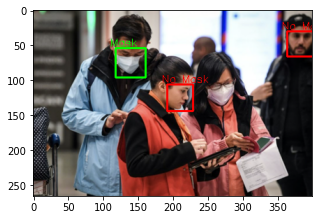

In [29]:
#traversing through the dictionary 
for key, value in foundobjectdict.items():
    #assigning color according to label the person has
    for i in range(len(value)):
        #by default , color and text for masked person to be: 'green' and 'mask' 
        color= (0,255,0)
        text='Mask'
        if key=='Without Mask':
            #color and text for unmasked person to be: 'red' and 'no mask'
            color= (255,0,0)
            text='No Mask'
        elif key== 'Incorrectly Worn':
            #color text for incorrectly worn masked person to be: 'yellow' and 'incorrect'
            color= (255,255,0)
            text='Incorrect'
        #finfing corners of starting line and ending lines of the face of person
        start=(value[i][0],value[i][1])
        end=(value[i][2],value[i][3])
        #creating a rectangle across the face according to the color
        cv2.rectangle(image52_rgb,start,end,color=color,thickness=2)
        #putting text on image with the rectangle
        cv2.putText(image52_rgb, org= (value[i][0]-8,value[i][1]-3),text=text,
                   fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.5,color=color)
#rendering image with the updates on the image
render(image52_rgb)

eda

In [30]:
#counted occurence of the label of images 
train_df['label'].value_counts()

with_mask                2560
without_mask              595
mask_weared_incorrect     102
Name: label, dtype: int64

In [31]:
#creating a sorted label into a Two-dimensional mutable dataframe with index 0,1,2 
sortedlabel=pd.DataFrame(train_df['label'].value_counts()).reset_index()
sortedlabel.rename(columns = {'index': 'label', 'label': 'count'}, inplace = True)
sortedlabel

,label,count
0,with_mask,2560
1,without_mask,595
2,mask_weared_incorrect,102


Text(0, 0.5, 'Label')

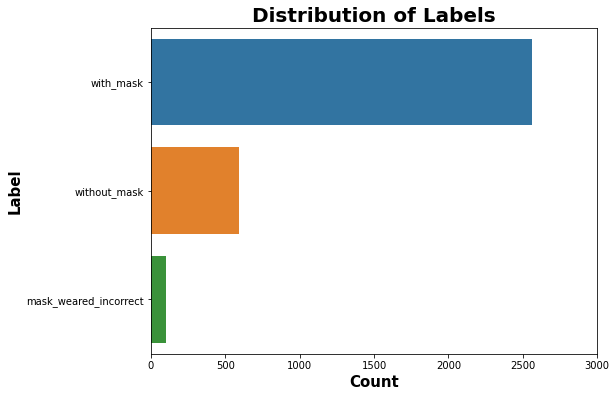

In [32]:
#plotting the barplot of the label occurred
# plt.style.use('seaborn')
plt.figure(figsize = (8, 6))

barplot = sns.barplot(x = 'count', y = 'label', data = sortedlabel)
plt.title('Distribution of Labels', fontsize = 20, fontweight = 'bold')
plt.xlim(0,3000)
plt.xlabel('Count', fontsize = 15, fontweight = 'bold')
plt.ylabel('Label', fontsize = 15, fontweight = 'bold')


In [33]:
#adding image width and image height of every image to the list 
imagewidth=[]
imageheight=[]
#traversing through the all image
for i in range(len(train_df)):
    croppedimagepath= './images/'+train_df.image_file.iloc[i] 
    croppedimage=cv2.imread(croppedimagepath)
    #adding image height and width of the image to list
    imagewidth.append(croppedimage.shape[0])
    imageheight.append(croppedimage.shape[1])

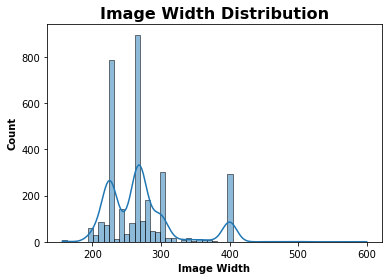

In [34]:
#plotting histogram of imagewidth
sns.histplot(imagewidth,kde=True)
plt.title('Image Width Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Image Width',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

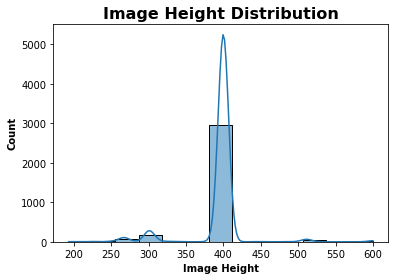

In [35]:
#plotting histogram of imageheight
sns.histplot(imageheight,kde=True)
plt.title('Image Height Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Image Height',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

preprocessing

In [58]:
#taking median of imagewidth and imageheight as targetimage size 
# targetimage=(int(np.median(imagewidth)),int(np.median(imageheight)))
targetimage=(256,256)
targetimage
# targetimage=(int(224),int(244))
# targetimage

(256, 256)

In [59]:
# using imagedatagenerator expand the training dataset in order 
# to improve the performance and ability of the model to generalize.
from keras_preprocessing.image import ImageDataGenerator
#rescale=1./255 will convert the pixels in range [0,255] to range [0,1], thus normalising the data and
#contributing to total losses , moreover we are also spliting image generator for 25 percent validation set.
train_image_generator= ImageDataGenerator(rescale= 1. / 255. , validation_split=0.25)
#train image generator to generate batches of tensor train image dataset with augmentation.
train_generator= train_image_generator.flow_from_dataframe(
    dataframe=train_df, 
    directory='./images/',
    x_col='image_file',
    y_col='label',
    # using 75%  dataset as training set
    subset='training',
    # size of batch of data being 32
    batch_size=32,
    seed=32,
    shuffle=True,
    class_mode= 'categorical',
    target_size = targetimage
    )
# valid image generator to generate batches of tensor valid image dataset with augmentation.
valid_generator= train_image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory= './images/',
    x_col='image_file',
    y_col='label',
    subset='validation',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_model= 'categorical',
    target_size=targetimage
    
)

Found 2443 validated image filenames belonging to 3 classes.
Found 814 validated image filenames belonging to 3 classes.


In [60]:
#also creating image generator for test dataset for randomness
test_image_generator= ImageDataGenerator(rescale = 1./255.)
#test image generator with augmented data to test acccuracy of the model
test_generator= train_image_generator.flow_from_dataframe(
    #will use test_df as dataframe
    dataframe=test_df,
    directory= './images/',
    x_col='image_file',
    y_col='label',
    batch_size=32,
    seed=32,
    shuffle=True,
    class_model= 'categorical',
    target_size=targetimage
    
)

Found 815 validated image filenames belonging to 3 classes.


In [61]:
a=train_generator.next()

model

In [62]:
#taking input shape as median of imagewidth,median of imageheight, 3 as channels because colours are RGB
inputshape= [int(267),int(400),3]
inputshape

[267, 400, 3]

In [63]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [64]:
from keras.applications import ResNet152V2
from keras.models import Model
from keras.layers import Dense ,GlobalAveragePooling2D,Flatten

In [65]:
# Function to initialize model (ResNet152V2)

def get_model():
    
    base_model = ResNet152V2(input_shape=(256,256,3), include_top=False)
    
    # for layers in base_model.layers[:140]:
    #     layers.trainable = False
    # for layers in base_model.layers[140:]:
    #     layers.trainable = True
        
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1000, activation='relu')(x)
    pred = Dense(10, activation='softmax')(x)
    x = Flatten()(x)
    pred=keras.layers.Dense(units=len(classes),activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=pred)
    
    return model

In [66]:
model=get_model()

In [51]:
#using a sequential model as there exist only one input that is the image and
#only one output that is whether it is with mask, no mask or incorrectly worn mask
model1= keras.models.Sequential([
    #Conv2D creates a convolution kernel that is combined with the layer input to produce a tensor of outputs
    #here filter provides a measure for a region of the input to resemble a feature
    #kernel size specifies the height and width of the 2D convolution window
    #activation has activation function relu(Rectified Linear Unit) which keeps all negative values to be zero and all other values to be constant
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=inputshape),
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    #MaxPool2D downsamples the input along its height and width by taking the maximum value over an input matrix for each channel of the input
    # pool_size signify window size (matrix window ) over which to take the maximum
    #padding valid ensure that no padding is necessary for model.
    keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    #flatten function will flattens the multi-dimensional input tensors into a single dimension
    keras.layers.Flatten(),
    #Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer
    #unit size decides  the dimensionality of the output space which is 3 in this case
    #activation function softmax has been used as class is of size 3 and softmax predicts a multinomial probability distribution
    keras.layers.Dense(units=len(classes),activation='softmax')
    
    
])

In [203]:
model1.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [67]:
#compiling the model by configuring the model with losses and metrics
#loss function used to find deviation in learning process;
#here categoricalcrossentrophy used as loss function because it is for multi-class classification model where there exists two or more output labels.
#optimiser optimizes the input weights by comparing the prediction and the loss function,Adam optimization is a stochastic gradient descent method as its faster
#Metrics is used to evaluate the performance of the model here mterics.recall recalls the prediction on basis of labels
model.compile(loss= 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [68]:
#fit trains the model for a fixed number of epochs
#here input is train_generator, epochs represents one complete pass of the training dataset through the algorithm
#steps_per_epoch is total number of batches of samples before declaring one epoch finished so the model goes through all the test generator data once in our case
#validation data is data on which to evaluate the loss and any model metrics at the end of each epoch, model is not trained on it
#validation steps is total number of batches of samples to draw before stopping when performing validation at the end of every epoch
history1=model.fit(train_generator,epochs=1,steps_per_epoch=len(train_generator))

In [191]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 265, 398, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 263, 396, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 131, 198, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 129, 196, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 127, 194, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 97, 10)       0         
 2D)                                                  

In [192]:
history1.history

{'loss': [0.6171011328697205], 'accuracy': [0.792468249797821]}

In [144]:
a=model1.predict(test_generator)

26/26 [==============================] - 20s 751ms/step
